In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyemma.coordinates as coor

In [185]:
plt.rcParams["figure.figsize"] = [9, 7]   #[9,7]
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['axes.labelsize'] = 30
plt.rcParams["axes.linewidth"] = 2.0
plt.rcParams["lines.linewidth"] = 2.0
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.markerscale'] = 2
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'

In [138]:
x = np.linspace(-2, 2, endpoint=True, num=200)
y = np.linspace(-5, 5, endpoint=True, num=200)
X, Y = np.meshgrid(x, y)
V = 5*(X**2-1)**2 + 0.25*(Y**2)

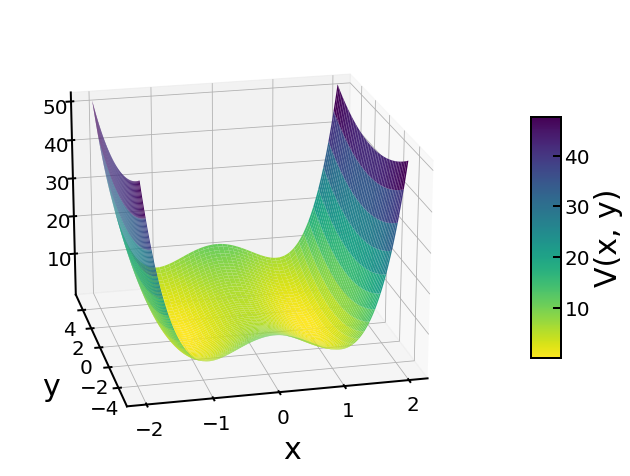

In [139]:
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, V, cmap = plt.cm.viridis_r)
plt.colorbar(surf, label='V(x, y)', pad=0.1, aspect=8, shrink=0.5)
ax.view_init(20, -103)
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.tight_layout()
#plt.savefig('../pca_vs_tica_2D-2_plot2.png')

## Contour Plot

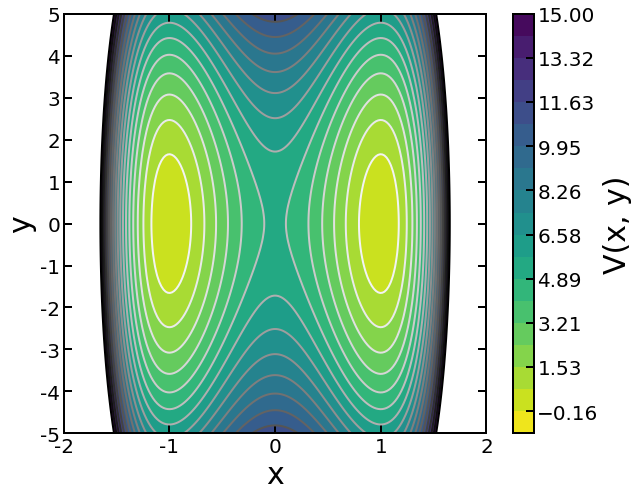

In [140]:
plt.figure()
c = plt.contourf(X, Y, V, np.linspace(-1, 15, 20), cmap='viridis_r')
plt.contour(X, Y, V, np.linspace(-1, 15, 20), cmap='Greys')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(c, label='V(x, y)')
ax = plt.gca()
ax.set_yticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax.set_yticklabels([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xticklabels([-2, -1, 0, 1, 2])
plt.tight_layout()
#plt.savefig('../pca_vs_tica_2D-2_plot1.png')

## Monte Carlo

In [8]:
def monte_carlo(x_init, y_init, kbt, k, lx, ly, nsteps):
    
    max_translate = 0.01
    

    x_pos_list = []
    y_pos_list = []
    step_list = []
    x_pos_list.append(x_init)
    y_pos_list.append(y_init)
    step_list.append(0)

    for i in range(1, nsteps+1):
        x_old = x_pos_list[i-1]
        y_old = y_pos_list[i-1]
        delta_x = np.random.uniform( -max_translate, max_translate )
        delta_y = np.random.uniform( -max_translate, max_translate )
        x_new = x_old + delta_x
        y_new = y_old + delta_y
        
        # Periodic Boundary Condition
        if(x_new > lx/2):
            x_new = x_new - lx
        elif(x_new < -lx/2):
            x_new = x_new + lx
            
        if(y_new > ly/2):
            y_new = y_new - ly
        elif(y_new < -ly/2):
            y_new = y_new + ly
            
            
        # Calculate Energies
        E_old = k*(x_old**2-1)**2 + 0.25*(y_old**2)
        E_new = k*(x_new**2-1)**2 + 0.25*(y_new**2)
        
        # Metropolis acceptance criteria
        if (E_new <= E_old):
            x_pos_list.append(x_new)
            y_pos_list.append(y_new)
        else:
            z = np.exp(-(E_new-E_old)/kbt)
            zeta = np.random.uniform(0.0, 1.0)
            if (z > zeta):
                x_pos_list.append(x_new)
                y_pos_list.append(y_new)
            else:
                x_pos_list.append(x_old)
                y_pos_list.append(y_old)
                
        step_list.append(i)
    return x_pos_list, y_pos_list, step_list

# Run
run = monte_carlo(-1, 0, 0.7, 5, 4, 10, 10000000)

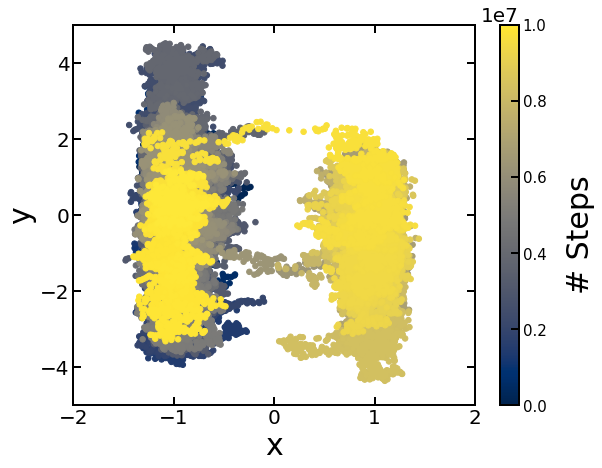

In [44]:
colors = np.linspace(0, len(run[2]), num=len(run[2][::100]), endpoint=True)
plt.scatter(run[0][::100], run[1][::100], c=colors, marker='o', s=30, cmap='cividis', alpha=1.0)
plt.xlim(-2, 2)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
cbr = plt.colorbar()
cbr.set_label('# Steps',labelpad=20, y=0.45)
for t in cbr.ax.get_yticklabels():
     t.set_fontsize(15)
#ax = plt.gca()
#ax.set_yticks([-2, -1, 0, 1, 2])
#ax.set_yticklabels([-2, -1, 0, 1, 2])
#ax.set_xticks([-2, -1, 0, 1, 2])
#ax.set_xticklabels([-2, -1, 0, 1, 2])
#plt.savefig('../pca_vs_tica_2.png')

## PCA & TICA

In [91]:
all_data = np.zeros((len(run[2]), 2))
for t in range(len(run[2])):
    all_data[t, 0] = run[0][t]
    all_data[t, 1] = run[1][t]

In [92]:
pca = coor.pca(data = all_data)
pc = pca.eigenvectors
S = pca.eigenvalues
print(S, pc[:,0], pc[:,1])
print('Length of eigenvectors::',np.linalg.norm(pc[:,0]), np.linalg.norm(pc[:,1]))
print('Dot product of two eigenvectors:', np.dot(pc[:,0], pc[:,1]))

/opt/homebrew/anaconda3/envs/PYEMMA2/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /opt/homebrew/anaconda3/envs/PYEMMA2/lib/python3.9/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)


[2.01889479 0.80171818] [-0.21721764  0.9761232 ] [-0.9761232  -0.21721764]
Length of eigenvectors:: 1.0 1.0
Dot product of two eigenvectors: 0.0


In [196]:
tica = coor.tica(data = all_data, lag=50000)
ic = tica.eigenvectors
L = tica.eigenvalues
print(L, ic[:,0], ic[:,1])
print('Length of eigenvectors::',np.linalg.norm(ic[:,0]), np.linalg.norm(ic[:,1]))
print('Dot product of two eigenvectors:', np.dot(ic[:,0], ic[:,1]))

/opt/homebrew/anaconda3/envs/PYEMMA2/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /opt/homebrew/anaconda3/envs/PYEMMA2/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


[0.95600006 0.65325313] [ 1.0239977  -0.01972883] [0.16135049 0.47502945]
Length of eigenvectors:: 1.0241877322854014 0.5016841244863053
Dot product of two eigenvectors: 0.09733036208546232


In [94]:
def draw_arrow(a, v, color):
    plt.arrow(0, 0, a*v[0], a*v[1], color=color, width=0.02, linewidth=3)

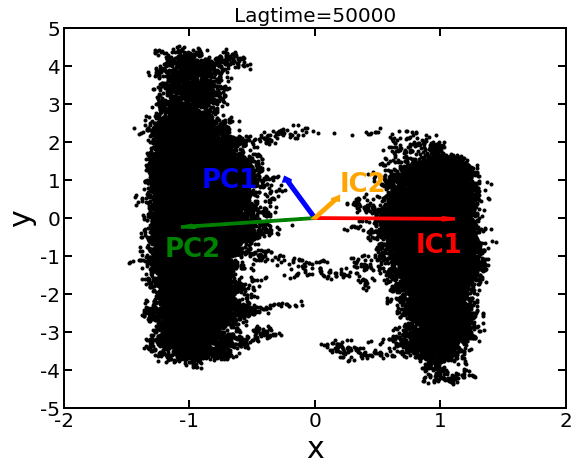

In [194]:
plt.scatter(run[0][::100], run[1][::100], marker = '.', color='black')
#c = plt.contourf(X, Y, V, np.linspace(-1, 15, 20), cmap='viridis_r')
#plt.contour(X, Y, V, np.linspace(-1, 15, 20), cmap='Greys')
draw_arrow(S[0], pc[:,0], color='blue')
draw_arrow(S[1], pc[:,1], color='green')
draw_arrow(L[0], ic[:,0], color='red')
draw_arrow(L[1], ic[:,1], color='orange')
plt.text(-0.9, 0.8, 'PC1', color='blue', fontsize = 26, fontweight='bold', rotation='horizontal')
plt.text(-1.2, -1.0, 'PC2', color='green', fontsize = 26, fontweight='bold', rotation='horizontal')

plt.text(0.8, -0.9, 'IC1', color='red', fontsize = 26, fontweight='bold', rotation='horizontal')
plt.text(0.2, 0.7, 'IC2', color='orange', fontsize = 26, fontweight='bold', rotation='horizontal')
plt.title('Lagtime=50000', fontsize=20)
plt.xlim(-2, 2)
plt.ylim(-4, 4)
plt.xlabel('x')
plt.ylabel('y')
ax = plt.gca()
ax.set_yticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax.set_yticklabels([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xticklabels([-2, -1, 0, 1, 2])
plt.savefig('../pca_vs_tica_2D_TICA-PCA-3.png')

In [182]:
Ypca1 = pca.get_output()[0][:,0]
Ypca2 = pca.get_output()[0][:,1]
print(f'Variance (should be same as eigenvalues {S})::', np.var(Ypca1), np.var(Ypca2))

Ytica1 = tica.get_output()[0][:,0]
Ytica2 = tica.get_output()[0][:,1]
print('Variance (should equal to 1)::', np.var(Ytica1), np.var(Ytica2))

Variance (should be same as eigenvalues [2.01889479 0.80171818]):: 2.0188935 0.8017183
Variance (should equal to 1):: 0.9120702 0.4254158


Text(0.5, 0, 'PC1 / IC1')

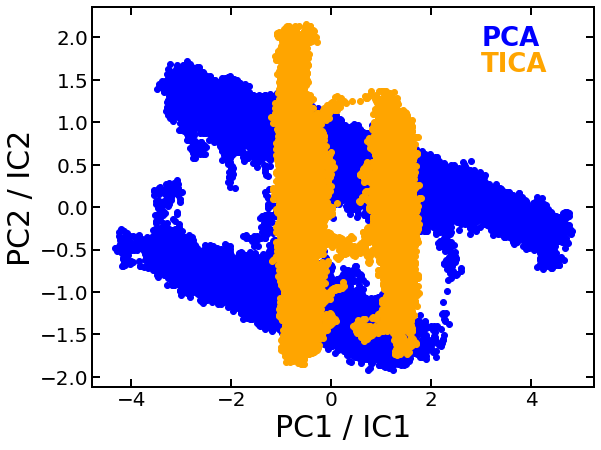

In [146]:
plt.scatter(Ypca1[::100], Ypca2[::100], c='blue')
plt.scatter(Ytica1[::100], Ytica2[::100], c='orange')
plt.text(3, 1.9, 'PCA', c='blue', fontsize=26, fontweight='bold')
plt.text(3, 1.6, 'TICA', c='orange', fontsize=26, fontweight='bold')
plt.ylabel('PC2 / IC2')
plt.xlabel('PC1 / IC1')
#plt.savefig('../pca_vs_tica_2D-2_proj.png')

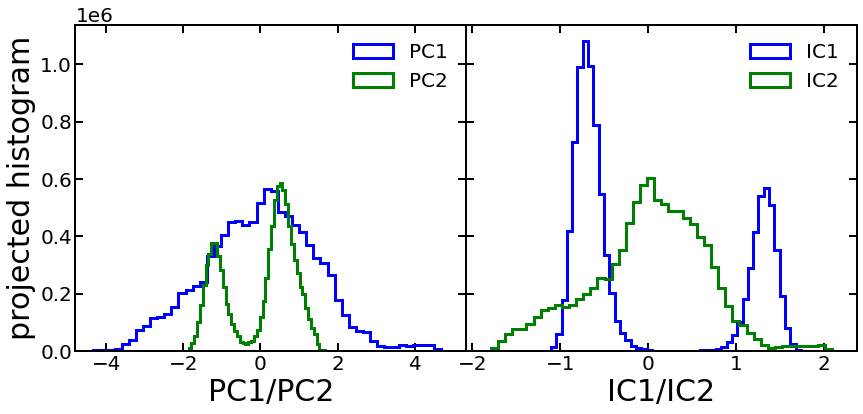

In [184]:

fig, ax = plt.subplots(1, 2, sharey=True)
fig.subplots_adjust(wspace=0)
ax[0].hist(Ypca1, bins=50, histtype='step', linewidth=3, label='PC1', color='blue')
ax[0].hist(Ypca2, bins=50, histtype='step', linewidth=3, label='PC2', color='green')

ax[1].hist(Ytica1, bins=50, histtype='step', linewidth=3, label='IC1', color='blue')
ax[1].hist(Ytica2, bins=50, histtype='step', linewidth=3, label='IC2', color='green')


ax[0].set_xlabel('PC1/PC2')
ax[1].set_xlabel('IC1/IC2')
ax[0].set_ylabel('projected histogram')
ax[0].legend()
ax[1].legend()
plt.savefig('../pca_vs_tica_2D_hist_50000.png')

## K-Means Clustering